<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/AGC27_2_1_HLC_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#License: GPL 
#Creator: Mike Smith https://github.com/gomlfx 
#designed for colab/kaggle/Jupyter

In [2]:
#!pip install autogluon
#!pip install --upgrade mxnet

     |████████████████████████████████| 188 kB 5.1 MB/s 
     |████████████████████████████████| 267 kB 48.9 MB/s 
     |████████████████████████████████| 48 kB 4.8 MB/s 
     |████████████████████████████████| 59 kB 6.1 MB/s 
     |████████████████████████████████| 133 kB 69.6 MB/s 
     |████████████████████████████████| 132 kB 52.0 MB/s 
     |████████████████████████████████| 1.0 MB 48.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.6 MB/s 
     |████████████████████████████████| 802 kB 17.3 MB/s 
     |████████████████████████████████| 54.7 MB 81 kB/s 
     |████████████████████████████████| 296 kB 11.1 MB/s 
     |██████████████████████████████▎ | 834.1 MB 8.1 MB/s eta 0:00:06tcmalloc: large alloc 1147494400 bytes == 0x2514000 @  0x7f55b47f3615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x51

In [3]:
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing

#autogluon
from autogluon.tabular import TabularDataset, TabularPredictor

In [4]:
#metatrader5 file format
df=pd.read_table('/content/NZDJPY_Daily_200702120000_202205120000.csv')

In [5]:
print(df.head())
print(df.tail())
df.info()

       <DATE>  <OPEN>  <HIGH>  <LOW>  <CLOSE>  <TICKVOL>  <VOL>  <SPREAD>
0  2007.02.12   83.47   83.49  83.10    83.19       2997      0        80
1  2007.02.13   83.18   83.69  82.86    83.60       6312      0        80
2  2007.02.14   83.61   83.94  83.18    83.33       7800      0        80
3  2007.02.15   83.34   83.65  82.55    82.71       9662      0        80
4  2007.02.16   82.72   83.28  82.70    83.25       6534      0        80
          <DATE>  <OPEN>  <HIGH>   <LOW>  <CLOSE>  <TICKVOL>  <VOL>  <SPREAD>
3954  2022.05.06  83.601  84.113  83.431   83.611      75644      0         2
3955  2022.05.09  83.499  83.674  82.328   82.360      77589      0         1
3956  2022.05.10  82.322  82.832  81.622   82.046      84737      0         3
3957  2022.05.11  82.029  82.996  81.479   81.795      81813      0         1
3958  2022.05.12  81.761  82.028  81.179   81.223      20918      0         3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Data columns (

In [6]:
df

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2007.02.12,83.470,83.490,83.100,83.190,2997,0,80
1,2007.02.13,83.180,83.690,82.860,83.600,6312,0,80
2,2007.02.14,83.610,83.940,83.180,83.330,7800,0,80
3,2007.02.15,83.340,83.650,82.550,82.710,9662,0,80
4,2007.02.16,82.720,83.280,82.700,83.250,6534,0,80
...,...,...,...,...,...,...,...,...
3954,2022.05.06,83.601,84.113,83.431,83.611,75644,0,2
3955,2022.05.09,83.499,83.674,82.328,82.360,77589,0,1
3956,2022.05.10,82.322,82.832,81.622,82.046,84737,0,3
3957,2022.05.11,82.029,82.996,81.479,81.795,81813,0,1


In [7]:
d = df[["<OPEN>","<HIGH>","<LOW>","<CLOSE>"]]
df = pd.DataFrame(data=d)
df

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,83.470,83.490,83.100,83.190
1,83.180,83.690,82.860,83.600
2,83.610,83.940,83.180,83.330
3,83.340,83.650,82.550,82.710
4,82.720,83.280,82.700,83.250
...,...,...,...,...
3954,83.601,84.113,83.431,83.611
3955,83.499,83.674,82.328,82.360
3956,82.322,82.832,81.622,82.046
3957,82.029,82.996,81.479,81.795


In [8]:
df_raw1 = pd.DataFrame(data=df)
df_raw1

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,83.470,83.490,83.100,83.190
1,83.180,83.690,82.860,83.600
2,83.610,83.940,83.180,83.330
3,83.340,83.650,82.550,82.710
4,82.720,83.280,82.700,83.250
...,...,...,...,...
3954,83.601,84.113,83.431,83.611
3955,83.499,83.674,82.328,82.360
3956,82.322,82.832,81.622,82.046
3957,82.029,82.996,81.479,81.795


In [9]:
stop_df = pd.DataFrame(data=df.tail(40))  
stop_df.iloc[:-1] 
stop_df1 = stop_df[stop_df['<OPEN>'] > stop_df['<CLOSE>']]
print(stop_df1)

stop_df2 = stop_df[stop_df['<OPEN>'] < stop_df['<CLOSE>']]
print(stop_df2)


      <OPEN>  <HIGH>   <LOW>  <CLOSE>
3924  85.160  85.228  84.441   84.938
3926  85.418  85.724  84.280   85.192
3927  85.208  85.561  84.432   84.967
3928  84.961  85.398  84.242   84.368
3932  85.841  86.308  85.366   85.589
3933  85.576  85.848  85.183   85.393
3934  85.345  85.564  84.971   85.091
3937  85.900  86.661  85.016   85.381
3940  85.416  85.784  85.116   85.414
3943  87.029  87.233  86.278   86.406
3944  86.409  86.524  85.054   85.274
3945  85.205  85.432  84.116   84.804
3946  84.809  85.135  83.442   83.474
3949  84.850  85.167  83.642   83.846
3950  83.860  84.199  83.438   83.751
3953  84.441  84.792  83.386   83.605
3955  83.499  83.674  82.328   82.360
3956  82.322  82.832  81.622   82.046
3957  82.029  82.996  81.479   81.795
3958  81.761  82.028  81.179   81.223
      <OPEN>  <HIGH>   <LOW>  <CLOSE>
3919  81.601  82.366  81.534   82.278
3920  82.047  82.526  81.915   82.258
3921  82.232  84.167  82.204   84.125
3922  84.071  84.651  83.703   84.452
3923  84.440

In [10]:

stop_df1['stop_for_sell'] = stop_df1['<HIGH>'] - stop_df1['<OPEN>']
print(stop_df1.stop_for_sell)

stop_df2['stop_for_buy'] = stop_df2['<OPEN>'] - stop_df2['<LOW>']
print(stop_df2.stop_for_buy)

3924    0.068
3926    0.306
3927    0.353
3928    0.437
3932    0.467
3933    0.272
3934    0.219
3937    0.761
3940    0.368
3943    0.204
3944    0.115
3945    0.227
3946    0.326
3949    0.317
3950    0.339
3953    0.351
3955    0.175
3956    0.510
3957    0.967
3958    0.267
Name: stop_for_sell, dtype: float64
3919    0.067
3920    0.132
3921    0.028
3922    0.368
3923    0.237
3925    0.007
3929    0.000
3930    0.107
3931    0.267
3935    0.045
3936    0.171
3938    0.092
3939    0.042
3941    0.066
3942    0.178
3947    0.186
3948    0.097
3951    0.325
3952    0.196
3954    0.170
Name: stop_for_buy, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [46]:
stop_for_sell = stop_df1.stop_for_sell.describe(percentiles=[.25,.5,.75,.9,.95,.99])
stop_for_buy = stop_df2.stop_for_buy.describe(percentiles=[.25,.5,.75,.9,.95,.99])
 

In [48]:
print(stop_for_sell)
print(stop_for_buy)

count    20.000000
mean      0.352450
std       0.209304
min       0.068000
25%       0.225000
50%       0.321500
75%       0.385250
90%       0.535100
95%       0.771300
99%       0.927860
max       0.967000
Name: stop_for_sell, dtype: float64
count    20.000000
mean      0.139050
std       0.103837
min       0.000000
25%       0.060750
50%       0.119500
75%       0.188500
90%       0.272800
95%       0.327150
99%       0.359830
max       0.368000
Name: stop_for_buy, dtype: float64


In [13]:
df.rename({'<OPEN>':'p_o','<HIGH>':'p_h','<LOW>':'p_l','<CLOSE>':'p_c'}, axis='columns', inplace=True)

In [14]:
df.info

<bound method DataFrame.info of          p_o     p_h     p_l     p_c
0     83.470  83.490  83.100  83.190
1     83.180  83.690  82.860  83.600
2     83.610  83.940  83.180  83.330
3     83.340  83.650  82.550  82.710
4     82.720  83.280  82.700  83.250
...      ...     ...     ...     ...
3954  83.601  84.113  83.431  83.611
3955  83.499  83.674  82.328  82.360
3956  82.322  82.832  81.622  82.046
3957  82.029  82.996  81.479  81.795
3958  81.761  82.028  81.179  81.223

[3959 rows x 4 columns]>

In [15]:
print(df.columns)

Index(['p_o', 'p_h', 'p_l', 'p_c'], dtype='object')


In [16]:
#Features

#210 periods ago
df['p_Open_last_period210'] = df['p_o'].shift(210) 
df['p_High_last_period210'] = df['p_h'].shift(210)
df['p_Low_last_period210'] = df['p_l'].shift(210)
df['p_Close_last_period210'] = df['p_c'].shift(210)
#209 periods ago
df['p_Open_last_period209'] = df['p_o'].shift(209) 
df['p_High_last_period209'] = df['p_h'].shift(209)
df['p_Low_last_period209'] = df['p_l'].shift(209)
df['p_Close_last_period209'] = df['p_c'].shift(209)
#208 periods ago
df['p_Open_last_period208'] = df['p_o'].shift(208) 
df['p_High_last_period208'] = df['p_h'].shift(208)
df['p_Low_last_period208'] = df['p_l'].shift(208)
df['p_Close_last_period208'] = df['p_c'].shift(208)
#207 periods ago
df['p_Open_last_period207'] = df['p_o'].shift(207) 
df['p_High_last_period207'] = df['p_h'].shift(207)
df['p_Low_last_period207'] = df['p_l'].shift(207)
df['p_Close_last_period207'] = df['p_c'].shift(207)
#206 periods ago
df['p_Open_last_period206'] = df['p_o'].shift(206) 
df['p_High_last_period206'] = df['p_h'].shift(206)
df['p_Low_last_period206'] = df['p_l'].shift(206)
df['p_Close_last_period206'] = df['p_c'].shift(206)
#205 periods ago
df['p_Open_last_period205'] = df['p_o'].shift(205) 
df['p_High_last_period205'] = df['p_h'].shift(205)
df['p_Low_last_period205'] = df['p_l'].shift(205)
df['p_Close_last_period205'] = df['p_c'].shift(205)
#204 periods ago
df['p_Open_last_period204'] = df['p_o'].shift(204) 
df['p_High_last_period204'] = df['p_h'].shift(204)
df['p_Low_last_period204'] = df['p_l'].shift(204)
df['p_Close_last_period204'] = df['p_c'].shift(204)
#203 periods ago
df['p_Open_last_period203'] = df['p_o'].shift(203) 
df['p_High_last_period203'] = df['p_h'].shift(203)
df['p_Low_last_period203'] = df['p_l'].shift(203)
df['p_Close_last_period203'] = df['p_c'].shift(203)
#202 periods ago
df['p_Open_last_period202'] = df['p_o'].shift(202) 
df['p_High_last_period202'] = df['p_h'].shift(202)
df['p_Low_last_period202'] = df['p_l'].shift(202)
df['p_Close_last_period202'] = df['p_c'].shift(202)
#201 periods ago
df['p_Open_last_period201'] = df['p_o'].shift(201) 
df['p_High_last_period201'] = df['p_h'].shift(201)
df['p_Low_last_period201'] = df['p_l'].shift(201)
df['p_Close_last_period201'] = df['p_c'].shift(201)
#200 periods ago
df['p_Open_last_period200'] = df['p_o'].shift(200) 
df['p_High_last_period200'] = df['p_h'].shift(200)
df['p_Low_last_period200'] = df['p_l'].shift(200)
df['p_Close_last_period200'] = df['p_c'].shift(200)
#199 periods ago
df['p_Open_last_period199'] = df['p_o'].shift(199) 
df['p_High_last_period199'] = df['p_h'].shift(199)
df['p_Low_last_period199'] = df['p_l'].shift(199)
df['p_Close_last_period199'] = df['p_c'].shift(199)
#198 periods ago
df['p_Open_last_period198'] = df['p_o'].shift(198) 
df['p_High_last_period198'] = df['p_h'].shift(198)
df['p_Low_last_period198'] = df['p_l'].shift(198)
df['p_Close_last_period198'] = df['p_c'].shift(198)
#197 periods ago
df['p_Open_last_period197'] = df['p_o'].shift(197) 
df['p_High_last_period197'] = df['p_h'].shift(197)
df['p_Low_last_period197'] = df['p_l'].shift(197)
df['p_Close_last_period197'] = df['p_c'].shift(197)
#196 periods ago
df['p_Open_last_period196'] = df['p_o'].shift(196) 
df['p_High_last_period196'] = df['p_h'].shift(196)
df['p_Low_last_period196'] = df['p_l'].shift(196)
df['p_Close_last_period196'] = df['p_c'].shift(196)
#195 periods ago
df['p_Open_last_period195'] = df['p_o'].shift(195) 
df['p_High_last_period195'] = df['p_h'].shift(195)
df['p_Low_last_period195'] = df['p_l'].shift(195)
df['p_Close_last_period195'] = df['p_c'].shift(195)
#194 periods ago
df['p_Open_last_period194'] = df['p_o'].shift(194) 
df['p_High_last_period194'] = df['p_h'].shift(194)
df['p_Low_last_period194'] = df['p_l'].shift(194)
df['p_Close_last_period194'] = df['p_c'].shift(194)
#193 periods ago
df['p_Open_last_period193'] = df['p_o'].shift(193) 
df['p_High_last_period193'] = df['p_h'].shift(193)
df['p_Low_last_period193'] = df['p_l'].shift(193)
df['p_Close_last_period193'] = df['p_c'].shift(193)
#192 periods ago
df['p_Open_last_period192'] = df['p_o'].shift(192) 
df['p_High_last_period192'] = df['p_h'].shift(192)
df['p_Low_last_period192'] = df['p_l'].shift(192)
df['p_Close_last_period192'] = df['p_c'].shift(192)
#191 periods ago
df['p_Open_last_period191'] = df['p_o'].shift(191) 
df['p_High_last_period191'] = df['p_h'].shift(191)
df['p_Low_last_period191'] = df['p_l'].shift(191)
df['p_Close_last_period191'] = df['p_c'].shift(191)
#190 periods ago
df['p_Open_last_period190'] = df['p_o'].shift(190) 
df['p_High_last_period190'] = df['p_h'].shift(190)
df['p_Low_last_period190'] = df['p_l'].shift(190)
df['p_Close_last_period190'] = df['p_c'].shift(190)
#189 periods ago
df['p_Open_last_period189'] = df['p_o'].shift(189) 
df['p_High_last_period189'] = df['p_h'].shift(189)
df['p_Low_last_period189'] = df['p_l'].shift(189)
df['p_Close_last_period189'] = df['p_c'].shift(189)
#188 periods ago
df['p_Open_last_period188'] = df['p_o'].shift(188) 
df['p_High_last_period188'] = df['p_h'].shift(188)
df['p_Low_last_period188'] = df['p_l'].shift(188)
df['p_Close_last_period188'] = df['p_c'].shift(188)
#187 periods ago
df['p_Open_last_period187'] = df['p_o'].shift(187) 
df['p_High_last_period187'] = df['p_h'].shift(187)
df['p_Low_last_period187'] = df['p_l'].shift(187)
df['p_Close_last_period187'] = df['p_c'].shift(187)
#186 periods ago
df['p_Open_last_period186'] = df['p_o'].shift(186) 
df['p_High_last_period186'] = df['p_h'].shift(186)
df['p_Low_last_period186'] = df['p_l'].shift(186)
df['p_Close_last_period186'] = df['p_c'].shift(186)
#185 periods ago
df['p_Open_last_period185'] = df['p_o'].shift(185) 
df['p_High_last_period185'] = df['p_h'].shift(185)
df['p_Low_last_period185'] = df['p_l'].shift(185)
df['p_Close_last_period185'] = df['p_c'].shift(185)
#184 periods ago
df['p_Open_last_period184'] = df['p_o'].shift(184) 
df['p_High_last_period184'] = df['p_h'].shift(184)
df['p_Low_last_period184'] = df['p_l'].shift(184)
df['p_Close_last_period184'] = df['p_c'].shift(184)
#183 periods ago
df['p_Open_last_period183'] = df['p_o'].shift(183) 
df['p_High_last_period183'] = df['p_h'].shift(183)
df['p_Low_last_period183'] = df['p_l'].shift(183)
df['p_Close_last_period183'] = df['p_c'].shift(183)
#182 periods ago
df['p_Open_last_period182'] = df['p_o'].shift(182) 
df['p_High_last_period182'] = df['p_h'].shift(182)
df['p_Low_last_period182'] = df['p_l'].shift(182)
df['p_Close_last_period182'] = df['p_c'].shift(182)
#181 periods ago
df['p_Open_last_period181'] = df['p_o'].shift(181) 
df['p_High_last_period181'] = df['p_h'].shift(181)
df['p_Low_last_period181'] = df['p_l'].shift(181)
df['p_Close_last_period181'] = df['p_c'].shift(181)
#180 periods ago
df['p_Open_last_period180'] = df['p_o'].shift(180) 
df['p_High_last_period180'] = df['p_h'].shift(180)
df['p_Low_last_period180'] = df['p_l'].shift(180)
df['p_Close_last_period180'] = df['p_c'].shift(180)
#179 periods ago
df['p_Open_last_period179'] = df['p_o'].shift(179) 
df['p_High_last_period179'] = df['p_h'].shift(179)
df['p_Low_last_period179'] = df['p_l'].shift(179)
df['p_Close_last_period179'] = df['p_c'].shift(179)
#178 periods ago
df['p_Open_last_period178'] = df['p_o'].shift(178) 
df['p_High_last_period178'] = df['p_h'].shift(178)
df['p_Low_last_period178'] = df['p_l'].shift(178)
df['p_Close_last_period178'] = df['p_c'].shift(178)
#177 periods ago
df['p_Open_last_period177'] = df['p_o'].shift(177) 
df['p_High_last_period177'] = df['p_h'].shift(177)
df['p_Low_last_period177'] = df['p_l'].shift(177)
df['p_Close_last_period177'] = df['p_c'].shift(177)
#176 periods ago
df['p_Open_last_period176'] = df['p_o'].shift(176) 
df['p_High_last_period176'] = df['p_h'].shift(176)
df['p_Low_last_period176'] = df['p_l'].shift(176)
df['p_Close_last_period176'] = df['p_c'].shift(176)
#194 periods ago
df['p_Open_last_period175'] = df['p_o'].shift(175) 
df['p_High_last_period175'] = df['p_h'].shift(175)
df['p_Low_last_period175'] = df['p_l'].shift(175)
df['p_Close_last_period175'] = df['p_c'].shift(175)
#174 periods ago
df['p_Open_last_period174'] = df['p_o'].shift(174) 
df['p_High_last_period174'] = df['p_h'].shift(174)
df['p_Low_last_period174'] = df['p_l'].shift(174)
df['p_Close_last_period174'] = df['p_c'].shift(174)
#173 periods ago
df['p_Open_last_period173'] = df['p_o'].shift(173) 
df['p_High_last_period173'] = df['p_h'].shift(173)
df['p_Low_last_period173'] = df['p_l'].shift(173)
df['p_Close_last_period173'] = df['p_c'].shift(173)
#172 periods ago
df['p_Open_last_period172'] = df['p_o'].shift(172) 
df['p_High_last_period172'] = df['p_h'].shift(172)
df['p_Low_last_period172'] = df['p_l'].shift(172)
df['p_Close_last_period172'] = df['p_c'].shift(172)
#171 periods ago
df['p_Open_last_period171'] = df['p_o'].shift(171) 
df['p_High_last_period171'] = df['p_h'].shift(171)
df['p_Low_last_period171'] = df['p_l'].shift(171)
df['p_Close_last_period171'] = df['p_c'].shift(171)
#170 periods ago
df['p_Open_last_period170'] = df['p_o'].shift(170) 
df['p_High_last_period170'] = df['p_h'].shift(170)
df['p_Low_last_period170'] = df['p_l'].shift(170)
df['p_Close_last_period170'] = df['p_c'].shift(170)
#169 periods ago
df['p_Open_last_period169'] = df['p_o'].shift(169) 
df['p_High_last_period169'] = df['p_h'].shift(169)
df['p_Low_last_period169'] = df['p_l'].shift(169)
df['p_Close_last_period169'] = df['p_c'].shift(169)
#168 periods ago
df['p_Open_last_period168'] = df['p_o'].shift(168) 
df['p_High_last_period168'] = df['p_h'].shift(168)
df['p_Low_last_period168'] = df['p_l'].shift(168)
df['p_Close_last_period168'] = df['p_c'].shift(168)
#167 periods ago
df['p_Open_last_period167'] = df['p_o'].shift(167) 
df['p_High_last_period167'] = df['p_h'].shift(167)
df['p_Low_last_period167'] = df['p_l'].shift(167)
df['p_Close_last_period167'] = df['p_c'].shift(167)
#166 periods ago
df['p_Open_last_period166'] = df['p_o'].shift(166) 
df['p_High_last_period166'] = df['p_h'].shift(166)
df['p_Low_last_period166'] = df['p_l'].shift(166)
df['p_Close_last_period166'] = df['p_c'].shift(166)
#165 periods ago
df['p_Open_last_period165'] = df['p_o'].shift(165) 
df['p_High_last_period165'] = df['p_h'].shift(165)
df['p_Low_last_period165'] = df['p_l'].shift(165)
df['p_Close_last_period165'] = df['p_c'].shift(165)
#164 periods ago
df['p_Open_last_period164'] = df['p_o'].shift(164) 
df['p_High_last_period164'] = df['p_h'].shift(164)
df['p_Low_last_period164'] = df['p_l'].shift(164)
df['p_Close_last_period164'] = df['p_c'].shift(164)
#163 periods ago
df['p_Open_last_period163'] = df['p_o'].shift(163) 
df['p_High_last_period163'] = df['p_h'].shift(163)
df['p_Low_last_period163'] = df['p_l'].shift(163)
df['p_Close_last_period163'] = df['p_c'].shift(163)
#162 periods ago
df['p_Open_last_period162'] = df['p_o'].shift(162) 
df['p_High_last_period162'] = df['p_h'].shift(162)
df['p_Low_last_period162'] = df['p_l'].shift(162)
df['p_Close_last_period162'] = df['p_c'].shift(162)
#161 periods ago
df['p_Open_last_period161'] = df['p_o'].shift(161) 
df['p_High_last_period161'] = df['p_h'].shift(161)
df['p_Low_last_period161'] = df['p_l'].shift(161)
df['p_Close_last_period161'] = df['p_c'].shift(161)
#160 periods ago
df['p_Open_last_period160'] = df['p_o'].shift(160) 
df['p_High_last_period160'] = df['p_h'].shift(160)
df['p_Low_last_period160'] = df['p_l'].shift(160)
df['p_Close_last_period160'] = df['p_c'].shift(160)
#59 periods ago
df['p_Open_last_period159'] = df['p_o'].shift(159) 
df['p_High_last_period159'] = df['p_h'].shift(159)
df['p_Low_last_period159'] = df['p_l'].shift(159)
df['p_Close_last_period159'] = df['p_c'].shift(159)
#158 periods ago
df['p_Open_last_period158'] = df['p_o'].shift(158) 
df['p_High_last_period158'] = df['p_h'].shift(158)
df['p_Low_last_period158'] = df['p_l'].shift(158)
df['p_Close_last_period158'] = df['p_c'].shift(158)
#157 periods ago
df['p_Open_last_period157'] = df['p_o'].shift(157) 
df['p_High_last_period157'] = df['p_h'].shift(157)
df['p_Low_last_period157'] = df['p_l'].shift(157)
df['p_Close_last_period157'] = df['p_c'].shift(157)
#156 periods ago
df['p_Open_last_period156'] = df['p_o'].shift(156) 
df['p_High_last_period156'] = df['p_h'].shift(156)
df['p_Low_last_period156'] = df['p_l'].shift(156)
df['p_Close_last_period156'] = df['p_c'].shift(156)
#155 periods ago
df['p_Open_last_period155'] = df['p_o'].shift(155) 
df['p_High_last_period155'] = df['p_h'].shift(155)
df['p_Low_last_period155'] = df['p_l'].shift(155)
df['p_Close_last_period155'] = df['p_c'].shift(155)
#154 periods ago
df['p_Open_last_period154'] = df['p_o'].shift(154) 
df['p_High_last_period154'] = df['p_h'].shift(154)
df['p_Low_last_period154'] = df['p_l'].shift(154)
df['p_Close_last_period154'] = df['p_c'].shift(154)
#153 periods ago
df['p_Open_last_period153'] = df['p_o'].shift(153) 
df['p_High_last_period153'] = df['p_h'].shift(153)
df['p_Low_last_period153'] = df['p_l'].shift(153)
df['p_Close_last_period153'] = df['p_c'].shift(153)
#152 periods ago
df['p_Open_last_period152'] = df['p_o'].shift(152) 
df['p_High_last_period152'] = df['p_h'].shift(152)
df['p_Low_last_period152'] = df['p_l'].shift(152)
df['p_Close_last_period152'] = df['p_c'].shift(152)
#151 periods ago
df['p_Open_last_period151'] = df['p_o'].shift(151) 
df['p_High_last_period151'] = df['p_h'].shift(151)
df['p_Low_last_period151'] = df['p_l'].shift(151)
df['p_Close_last_period151'] = df['p_c'].shift(151)
#150 periods ago
df['p_Open_last_period150'] = df['p_o'].shift(150) 
df['p_High_last_period150'] = df['p_h'].shift(150)
df['p_Low_last_period150'] = df['p_l'].shift(150)
df['p_Close_last_period150'] = df['p_c'].shift(150)
#149 periods ago
df['p_Open_last_period149'] = df['p_o'].shift(149) 
df['p_High_last_period149'] = df['p_h'].shift(149)
df['p_Low_last_period149'] = df['p_l'].shift(149)
df['p_Close_last_period149'] = df['p_c'].shift(149)
#148 periods ago
df['p_Open_last_period148'] = df['p_o'].shift(148) 
df['p_High_last_period148'] = df['p_h'].shift(148)
df['p_Low_last_period148'] = df['p_l'].shift(148)
df['p_Close_last_period148'] = df['p_c'].shift(148)
#147 periods ago
df['p_Open_last_period147'] = df['p_o'].shift(147) 
df['p_High_last_period147'] = df['p_h'].shift(147)
df['p_Low_last_period147'] = df['p_l'].shift(147)
df['p_Close_last_period147'] = df['p_c'].shift(147)
#146 periods ago
df['p_Open_last_period146'] = df['p_o'].shift(146) 
df['p_High_last_period146'] = df['p_h'].shift(146)
df['p_Low_last_period146'] = df['p_l'].shift(146)
df['p_Close_last_period146'] = df['p_c'].shift(146)
#145 periods ago
df['p_Open_last_period145'] = df['p_o'].shift(145) 
df['p_High_last_period145'] = df['p_h'].shift(145)
df['p_Low_last_period145'] = df['p_l'].shift(145)
df['p_Close_last_period145'] = df['p_c'].shift(145)
#144 periods ago
df['p_Open_last_period144'] = df['p_o'].shift(144) 
df['p_High_last_period144'] = df['p_h'].shift(144)
df['p_Low_last_period144'] = df['p_l'].shift(144)
df['p_Close_last_period144'] = df['p_c'].shift(144)
#143 periods ago
df['p_Open_last_period143'] = df['p_o'].shift(143) 
df['p_High_last_period143'] = df['p_h'].shift(143)
df['p_Low_last_period143'] = df['p_l'].shift(143)
df['p_Close_last_period143'] = df['p_c'].shift(143)
#142 periods ago
df['p_Open_last_period142'] = df['p_o'].shift(142) 
df['p_High_last_period142'] = df['p_h'].shift(142)
df['p_Low_last_period142'] = df['p_l'].shift(142)
df['p_Close_last_period142'] = df['p_c'].shift(142)
#141 periods ago
df['p_Open_last_period141'] = df['p_o'].shift(141) 
df['p_High_last_period141'] = df['p_h'].shift(141)
df['p_Low_last_period141'] = df['p_l'].shift(141)
df['p_Close_last_period141'] = df['p_c'].shift(141)
#140 periods ago
df['p_Open_last_period140'] = df['p_o'].shift(140) 
df['p_High_last_period140'] = df['p_h'].shift(140)
df['p_Low_last_period140'] = df['p_l'].shift(140)
df['p_Close_last_period140'] = df['p_c'].shift(140)
#139 periods ago
df['p_Open_last_period139'] = df['p_o'].shift(139) 
df['p_High_last_period139'] = df['p_h'].shift(139)
df['p_Low_last_period139'] = df['p_l'].shift(139)
df['p_Close_last_period139'] = df['p_c'].shift(139)
#138 periods ago
df['p_Open_last_period138'] = df['p_o'].shift(138) 
df['p_High_last_period138'] = df['p_h'].shift(138)
df['p_Low_last_period138'] = df['p_l'].shift(138)
df['p_Close_last_period138'] = df['p_c'].shift(138)
#137 periods ago
df['p_Open_last_period137'] = df['p_o'].shift(137) 
df['p_High_last_period137'] = df['p_h'].shift(137)
df['p_Low_last_period137'] = df['p_l'].shift(137)
df['p_Close_last_period137'] = df['p_c'].shift(137)
#136 periods ago
df['p_Open_last_period136'] = df['p_o'].shift(136) 
df['p_High_last_period136'] = df['p_h'].shift(136)
df['p_Low_last_period136'] = df['p_l'].shift(136)
df['p_Close_last_period136'] = df['p_c'].shift(136)
#135 periods ago
df['p_Open_last_period135'] = df['p_o'].shift(135) 
df['p_High_last_period135'] = df['p_h'].shift(135)
df['p_Low_last_period135'] = df['p_l'].shift(135)
df['p_Close_last_period135'] = df['p_c'].shift(135)
#134 periods ago
df['p_Open_last_period134'] = df['p_o'].shift(134) 
df['p_High_last_period134'] = df['p_h'].shift(134)
df['p_Low_last_period134'] = df['p_l'].shift(134)
df['p_Close_last_period134'] = df['p_c'].shift(134)
#133 periods ago
df['p_Open_last_period133'] = df['p_o'].shift(133) 
df['p_High_last_period133'] = df['p_h'].shift(133)
df['p_Low_last_period133'] = df['p_l'].shift(133)
df['p_Close_last_period133'] = df['p_c'].shift(133)
#132 periods ago
df['p_Open_last_period132'] = df['p_o'].shift(132) 
df['p_High_last_period132'] = df['p_h'].shift(132)
df['p_Low_last_period132'] = df['p_l'].shift(132)
df['p_Close_last_period132'] = df['p_c'].shift(132)
#131 periods ago
df['p_Open_last_period131'] = df['p_o'].shift(131) 
df['p_High_last_period131'] = df['p_h'].shift(131)
df['p_Low_last_period131'] = df['p_l'].shift(131)
df['p_Close_last_period131'] = df['p_c'].shift(131)
#130 periods ago
df['p_Open_last_period130'] = df['p_o'].shift(130) 
df['p_High_last_period130'] = df['p_h'].shift(130)
df['p_Low_last_period130'] = df['p_l'].shift(130)
df['p_Close_last_period130'] = df['p_c'].shift(130)
#129 periods ago
df['p_Open_last_period129'] = df['p_o'].shift(129) 
df['p_High_last_period129'] = df['p_h'].shift(129)
df['p_Low_last_period129'] = df['p_l'].shift(129)
df['p_Close_last_period129'] = df['p_c'].shift(129)
#128 periods ago
df['p_Open_last_period128'] = df['p_o'].shift(128) 
df['p_High_last_period128'] = df['p_h'].shift(128)
df['p_Low_last_period128'] = df['p_l'].shift(128)
df['p_Close_last_period128'] = df['p_c'].shift(128)
#127 periods ago
df['p_Open_last_period127'] = df['p_o'].shift(127) 
df['p_High_last_period127'] = df['p_h'].shift(127)
df['p_Low_last_period127'] = df['p_l'].shift(127)
df['p_Close_last_period127'] = df['p_c'].shift(127)
#126 periods ago
df['p_Open_last_period126'] = df['p_o'].shift(126) 
df['p_High_last_period126'] = df['p_h'].shift(126)
df['p_Low_last_period126'] = df['p_l'].shift(126)
df['p_Close_last_period126'] = df['p_c'].shift(126)
#125 periods ago
df['p_Open_last_period125'] = df['p_o'].shift(125) 
df['p_High_last_period125'] = df['p_h'].shift(125)
df['p_Low_last_period125'] = df['p_l'].shift(125)
df['p_Close_last_period125'] = df['p_c'].shift(125)
#124 periods ago
df['p_Open_last_period124'] = df['p_o'].shift(124) 
df['p_High_last_period124'] = df['p_h'].shift(124)
df['p_Low_last_period124'] = df['p_l'].shift(124)
df['p_Close_last_period124'] = df['p_c'].shift(124)
#123 periods ago
df['p_Open_last_period123'] = df['p_o'].shift(123) 
df['p_High_last_period123'] = df['p_h'].shift(123)
df['p_Low_last_period123'] = df['p_l'].shift(123)
df['p_Close_last_period123'] = df['p_c'].shift(123)
#122 periods ago
df['p_Open_last_period122'] = df['p_o'].shift(122) 
df['p_High_last_period122'] = df['p_h'].shift(122)
df['p_Low_last_period122'] = df['p_l'].shift(122)
df['p_Close_last_period122'] = df['p_c'].shift(122)
#121 periods ago
df['p_Open_last_period121'] = df['p_o'].shift(121) 
df['p_High_last_period121'] = df['p_h'].shift(21)
df['p_Low_last_period121'] = df['p_l'].shift(121)
df['p_Close_last_period121'] = df['p_c'].shift(121)
#120 periods ago
df['p_Open_last_period120'] = df['p_o'].shift(120) 
df['p_High_last_period120'] = df['p_h'].shift(120)
df['p_Low_last_period120'] = df['p_l'].shift(120)
df['p_Close_last_period120'] = df['p_c'].shift(120)
#119 periods ago
df['p_Open_last_period119'] = df['p_o'].shift(119) 
df['p_High_last_period119'] = df['p_h'].shift(119)
df['p_Low_last_period119'] = df['p_l'].shift(119)
df['p_Close_last_period119'] = df['p_c'].shift(119)
#118 periods ago
df['p_Open_last_period118'] = df['p_o'].shift(118) 
df['p_High_last_period118'] = df['p_h'].shift(118)
df['p_Low_last_period118'] = df['p_l'].shift(118)
df['p_Close_last_period118'] = df['p_c'].shift(118)
#117 periods ago
df['p_Open_last_period117'] = df['p_o'].shift(117) 
df['p_High_last_period117'] = df['p_h'].shift(117)
df['p_Low_last_period117'] = df['p_l'].shift(117)
df['p_Close_last_period117'] = df['p_c'].shift(117)
#116 periods ago
df['p_Open_last_period116'] = df['p_o'].shift(116) 
df['p_High_last_period116'] = df['p_h'].shift(116)
df['p_Low_last_period116'] = df['p_l'].shift(116)
df['p_Close_last_period116'] = df['p_c'].shift(116)
#115 periods ago
df['p_Open_last_period115'] = df['p_o'].shift(115) 
df['p_High_last_period115'] = df['p_h'].shift(115)
df['p_Low_last_period115'] = df['p_l'].shift(115)
df['p_Close_last_period115'] = df['p_c'].shift(115)
#114 periods ago
df['p_Open_last_period114'] = df['p_o'].shift(114) 
df['p_High_last_period114'] = df['p_h'].shift(114)
df['p_Low_last_period1014'] = df['p_l'].shift(114)
df['p_Close_last_period114'] = df['p_c'].shift(114)
#113 periods ago
df['p_Open_last_period113'] = df['p_o'].shift(113) 
df['p_High_last_period113'] = df['p_h'].shift(113)
df['p_Low_last_period113'] = df['p_l'].shift(113)
df['p_Close_last_period113'] = df['p_c'].shift(113)
#112 periods ago
df['p_Open_last_period112'] = df['p_o'].shift(112) 
df['p_High_last_period112'] = df['p_h'].shift(112)
df['p_Low_last_period112'] = df['p_l'].shift(112)
df['p_Close_last_period112'] = df['p_c'].shift(112)
#111 periods ago
df['p_Open_last_period111'] = df['p_o'].shift(111) 
df['p_High_last_period111'] = df['p_h'].shift(111)
df['p_Low_last_period111'] = df['p_l'].shift(111)
df['p_Close_last_period111'] = df['p_c'].shift(111)
#110 periods ago
df['p_Open_last_period110'] = df['p_o'].shift(110) 
df['p_High_last_period110'] = df['p_h'].shift(110)
df['p_Low_last_period110'] = df['p_l'].shift(110)
df['p_Close_last_period110'] = df['p_c'].shift(110)
#109 periods ago
df['p_Open_last_period109'] = df['p_o'].shift(109) 
df['p_High_last_period109'] = df['p_h'].shift(109)
df['p_Low_last_period109'] = df['p_l'].shift(109)
df['p_Close_last_period109'] = df['p_c'].shift(109)
#108 periods ago
df['p_Open_last_period108'] = df['p_o'].shift(108) 
df['p_High_last_period108'] = df['p_h'].shift(108)
df['p_Low_last_period108'] = df['p_l'].shift(108)
df['p_Close_last_period108'] = df['p_c'].shift(108)
#107 periods ago
df['p_Open_last_period107'] = df['p_o'].shift(107) 
df['p_High_last_period107'] = df['p_h'].shift(107)
df['p_Low_last_period107'] = df['p_l'].shift(107)
df['p_Close_last_period107'] = df['p_c'].shift(107)
#106 periods ago
df['p_Open_last_period106'] = df['p_o'].shift(106) 
df['p_High_last_period106'] = df['p_h'].shift(106)
df['p_Low_last_period106'] = df['p_l'].shift(106)
df['p_Close_last_period106'] = df['p_c'].shift(106)
#105 periods ago
df['p_Open_last_period105'] = df['p_o'].shift(105) 
df['p_High_last_period105'] = df['p_h'].shift(105)
df['p_Low_last_period105'] = df['p_l'].shift(105)
df['p_Close_last_period105'] = df['p_c'].shift(105)
#104 periods ago
df['p_Open_last_period104'] = df['p_o'].shift(104) 
df['p_High_last_period104'] = df['p_h'].shift(104)
df['p_Low_last_period104'] = df['p_l'].shift(104)
df['p_Close_last_period104'] = df['p_c'].shift(104)
#103 periods ago
df['p_Open_last_period103'] = df['p_o'].shift(103) 
df['p_High_last_period103'] = df['p_h'].shift(103)
df['p_Low_last_period103'] = df['p_l'].shift(103)
df['p_Close_last_period103'] = df['p_c'].shift(103)
#102 periods ago
df['p_Open_last_period102'] = df['p_o'].shift(102) 
df['p_High_last_period102'] = df['p_h'].shift(102)
df['p_Low_last_period102'] = df['p_l'].shift(102)
df['p_Close_last_period102'] = df['p_c'].shift(102)
#101 periods ago
df['p_Open_last_period101'] = df['p_o'].shift(101) 
df['p_High_last_period101'] = df['p_h'].shift(101)
df['p_Low_last_period101'] = df['p_l'].shift(101)
df['p_Close_last_period101'] = df['p_c'].shift(101)
#100 periods ago
df['p_Open_last_period100'] = df['p_o'].shift(100) 
df['p_High_last_period100'] = df['p_h'].shift(100)
df['p_Low_last_period100'] = df['p_l'].shift(100)
df['p_Close_last_period100'] = df['p_c'].shift(100)
#99 periods ago
df['p_Open_last_period99'] = df['p_o'].shift(99) 
df['p_High_last_period99'] = df['p_h'].shift(99)
df['p_Low_last_period99'] = df['p_l'].shift(99)
df['p_Close_last_period99'] = df['p_c'].shift(99)
#98 periods ago
df['p_Open_last_period98'] = df['p_o'].shift(98) 
df['p_High_last_period98'] = df['p_h'].shift(98)
df['p_Low_last_period98'] = df['p_l'].shift(98)
df['p_Close_last_period98'] = df['p_c'].shift(98)
#97 periods ago
df['p_Open_last_period97'] = df['p_o'].shift(97) 
df['p_High_last_period97'] = df['p_h'].shift(97)
df['p_Low_last_period97'] = df['p_l'].shift(97)
df['p_Close_last_period97'] = df['p_c'].shift(97)
#96 periods ago
df['p_Open_last_period96'] = df['p_o'].shift(96) 
df['p_High_last_period96'] = df['p_h'].shift(96)
df['p_Low_last_period96'] = df['p_l'].shift(96)
df['p_Close_last_period96'] = df['p_c'].shift(96)
#95 periods ago
df['p_Open_last_period95'] = df['p_o'].shift(95) 
df['p_High_last_period95'] = df['p_h'].shift(95)
df['p_Low_last_period95'] = df['p_l'].shift(95)
df['p_Close_last_period95'] = df['p_c'].shift(95)
#94 periods ago
df['p_Open_last_period94'] = df['p_o'].shift(94) 
df['p_High_last_period94'] = df['p_h'].shift(94)
df['p_Low_last_period94'] = df['p_l'].shift(94)
df['p_Close_last_period94'] = df['p_c'].shift(94)
#93 periods ago
df['p_Open_last_period93'] = df['p_o'].shift(93) 
df['p_High_last_period93'] = df['p_h'].shift(93)
df['p_Low_last_period93'] = df['p_l'].shift(93)
df['p_Close_last_period93'] = df['p_c'].shift(93)
#92 periods ago
df['p_Open_last_period92'] = df['p_o'].shift(92) 
df['p_High_last_period92'] = df['p_h'].shift(92)
df['p_Low_last_period92'] = df['p_l'].shift(92)
df['p_Close_last_period92'] = df['p_c'].shift(92)
#91 periods ago
df['p_Open_last_period91'] = df['p_o'].shift(91) 
df['p_High_last_period91'] = df['p_h'].shift(91)
df['p_Low_last_period91'] = df['p_l'].shift(91)
df['p_Close_last_period91'] = df['p_c'].shift(91)
#90 periods ago
df['p_Open_last_period90'] = df['p_o'].shift(90) 
df['p_High_last_period90'] = df['p_h'].shift(90)
df['p_Low_last_period90'] = df['p_l'].shift(90)
df['p_Close_last_period90'] = df['p_c'].shift(90)
#89 periods ago
df['p_Open_last_period89'] = df['p_o'].shift(89) 
df['p_High_last_period89'] = df['p_h'].shift(89)
df['p_Low_last_period89'] = df['p_l'].shift(89)
df['p_Close_last_period89'] = df['p_c'].shift(89)
#88 periods ago
df['p_Open_last_period88'] = df['p_o'].shift(88) 
df['p_High_last_period88'] = df['p_h'].shift(88)
df['p_Low_last_period88'] = df['p_l'].shift(88)
df['p_Close_last_period88'] = df['p_c'].shift(88)
#87 periods ago
df['p_Open_last_period87'] = df['p_o'].shift(87) 
df['p_High_last_period87'] = df['p_h'].shift(87)
df['p_Low_last_period87'] = df['p_l'].shift(87)
df['p_Close_last_period87'] = df['p_c'].shift(87)
#86 periods ago
df['p_Open_last_period86'] = df['p_o'].shift(86) 
df['p_High_last_period86'] = df['p_h'].shift(86)
df['p_Low_last_period86'] = df['p_l'].shift(86)
df['p_Close_last_period86'] = df['p_c'].shift(86)
#85 periods ago
df['p_Open_last_period85'] = df['p_o'].shift(85) 
df['p_High_last_period85'] = df['p_h'].shift(85)
df['p_Low_last_period85'] = df['p_l'].shift(85)
df['p_Close_last_period85'] = df['p_c'].shift(85)
#84 periods ago
df['p_Open_last_period84'] = df['p_o'].shift(84) 
df['p_High_last_period84'] = df['p_h'].shift(84)
df['p_Low_last_period84'] = df['p_l'].shift(84)
df['p_Close_last_period84'] = df['p_c'].shift(84)
#83 periods ago
df['p_Open_last_period83'] = df['p_o'].shift(83) 
df['p_High_last_period83'] = df['p_h'].shift(83)
df['p_Low_last_period83'] = df['p_l'].shift(83)
df['p_Close_last_period83'] = df['p_c'].shift(83)
#82 periods ago
df['p_Open_last_period82'] = df['p_o'].shift(82) 
df['p_High_last_period82'] = df['p_h'].shift(82)
df['p_Low_last_period82'] = df['p_l'].shift(82)
df['p_Close_last_period82'] = df['p_c'].shift(82)
#81 periods ago
df['p_Open_last_period81'] = df['p_o'].shift(81) 
df['p_High_last_period81'] = df['p_h'].shift(81)
df['p_Low_last_period81'] = df['p_l'].shift(81)
df['p_Close_last_period81'] = df['p_c'].shift(81)
#80 periods ago
df['p_Open_last_period80'] = df['p_o'].shift(80) 
df['p_High_last_period80'] = df['p_h'].shift(80)
df['p_Low_last_period80'] = df['p_l'].shift(80)
df['p_Close_last_period80'] = df['p_c'].shift(80)
#79 periods ago
df['p_Open_last_period79'] = df['p_o'].shift(79) 
df['p_High_last_period79'] = df['p_h'].shift(79)
df['p_Low_last_period79'] = df['p_l'].shift(79)
df['p_Close_last_period79'] = df['p_c'].shift(79)
#78 periods ago
df['p_Open_last_period78'] = df['p_o'].shift(78) 
df['p_High_last_period78'] = df['p_h'].shift(78)
df['p_Low_last_period78'] = df['p_l'].shift(78)
df['p_Close_last_period78'] = df['p_c'].shift(78)
#77 periods ago
df['p_Open_last_period77'] = df['p_o'].shift(77) 
df['p_High_last_period77'] = df['p_h'].shift(77)
df['p_Low_last_period77'] = df['p_l'].shift(77)
df['p_Close_last_period77'] = df['p_c'].shift(77)
#76 periods ago
df['p_Open_last_period76'] = df['p_o'].shift(76) 
df['p_High_last_period76'] = df['p_h'].shift(76)
df['p_Low_last_period76'] = df['p_l'].shift(76)
df['p_Close_last_period76'] = df['p_c'].shift(76)
#75 periods ago
df['p_Open_last_period75'] = df['p_o'].shift(75) 
df['p_High_last_period75'] = df['p_h'].shift(75)
df['p_Low_last_period75'] = df['p_l'].shift(75)
df['p_Close_last_period75'] = df['p_c'].shift(75)
#74 periods ago
df['p_Open_last_period74'] = df['p_o'].shift(74) 
df['p_High_last_period74'] = df['p_h'].shift(74)
df['p_Low_last_period74'] = df['p_l'].shift(74)
df['p_Close_last_period74'] = df['p_c'].shift(74)
#73 periods ago
df['p_Open_last_period73'] = df['p_o'].shift(73) 
df['p_High_last_period73'] = df['p_h'].shift(73)
df['p_Low_last_period73'] = df['p_l'].shift(73)
df['p_Close_last_period73'] = df['p_c'].shift(73)
#72 periods ago
df['p_Open_last_period72'] = df['p_o'].shift(72) 
df['p_High_last_period72'] = df['p_h'].shift(72)
df['p_Low_last_period72'] = df['p_l'].shift(72)
df['p_Close_last_period72'] = df['p_c'].shift(72)
#71 periods ago
df['p_Open_last_period71'] = df['p_o'].shift(71) 
df['p_High_last_period71'] = df['p_h'].shift(71)
df['p_Low_last_period71'] = df['p_l'].shift(71)
df['p_Close_last_period71'] = df['p_c'].shift(71)
#70 periods ago
df['p_Open_last_period70'] = df['p_o'].shift(70) 
df['p_High_last_period70'] = df['p_h'].shift(70)
df['p_Low_last_period70'] = df['p_l'].shift(70)
df['p_Close_last_period70'] = df['p_c'].shift(70)
#69 periods ago
df['p_Open_last_period69'] = df['p_o'].shift(69) 
df['p_High_last_period69'] = df['p_h'].shift(69)
df['p_Low_last_period69'] = df['p_l'].shift(69)
df['p_Close_last_period69'] = df['p_c'].shift(69)
#68 periods ago
df['p_Open_last_period68'] = df['p_o'].shift(68) 
df['p_High_last_period68'] = df['p_h'].shift(68)
df['p_Low_last_period68'] = df['p_l'].shift(68)
df['p_Close_last_period68'] = df['p_c'].shift(68)
#67 periods ago
df['p_Open_last_period67'] = df['p_o'].shift(67) 
df['p_High_last_period67'] = df['p_h'].shift(67)
df['p_Low_last_period67'] = df['p_l'].shift(67)
df['p_Close_last_period67'] = df['p_c'].shift(67)
#66 periods ago
df['p_Open_last_period66'] = df['p_o'].shift(66) 
df['p_High_last_period66'] = df['p_h'].shift(66)
df['p_Low_last_period66'] = df['p_l'].shift(66)
df['p_Close_last_period66'] = df['p_c'].shift(66)
#65 periods ago
df['p_Open_last_period65'] = df['p_o'].shift(65) 
df['p_High_last_period65'] = df['p_h'].shift(65)
df['p_Low_last_period65'] = df['p_l'].shift(65)
df['p_Close_last_period65'] = df['p_c'].shift(65)
#64 periods ago
df['p_Open_last_period64'] = df['p_o'].shift(64) 
df['p_High_last_period64'] = df['p_h'].shift(64)
df['p_Low_last_period64'] = df['p_l'].shift(64)
df['p_Close_last_period64'] = df['p_c'].shift(64)
#63 periods ago
df['p_Open_last_period63'] = df['p_o'].shift(63) 
df['p_High_last_period63'] = df['p_h'].shift(63)
df['p_Low_last_period63'] = df['p_l'].shift(63)
df['p_Close_last_period63'] = df['p_c'].shift(63)
#62 periods ago
df['p_Open_last_period62'] = df['p_o'].shift(62) 
df['p_High_last_period62'] = df['p_h'].shift(62)
df['p_Low_last_period62'] = df['p_l'].shift(62)
df['p_Close_last_period62'] = df['p_c'].shift(62)
#61 periods ago
df['p_Open_last_period61'] = df['p_o'].shift(61) 
df['p_High_last_period61'] = df['p_h'].shift(61)
df['p_Low_last_period61'] = df['p_l'].shift(61)
df['p_Close_last_period61'] = df['p_c'].shift(61)
#60 periods ago
df['p_Open_last_period60'] = df['p_o'].shift(60) 
df['p_High_last_period60'] = df['p_h'].shift(60)
df['p_Low_last_period60'] = df['p_l'].shift(60)
df['p_Close_last_period60'] = df['p_c'].shift(60)
#59 periods ago
df['p_Open_last_period59'] = df['p_o'].shift(59) 
df['p_High_last_period59'] = df['p_h'].shift(59)
df['p_Low_last_period59'] = df['p_l'].shift(59)
df['p_Close_last_period59'] = df['p_c'].shift(59)
#58 periods ago
df['p_Open_last_period58'] = df['p_o'].shift(58) 
df['p_High_last_period58'] = df['p_h'].shift(58)
df['p_Low_last_period58'] = df['p_l'].shift(58)
df['p_Close_last_period58'] = df['p_c'].shift(58)
#57 periods ago
df['p_Open_last_period57'] = df['p_o'].shift(57) 
df['p_High_last_period57'] = df['p_h'].shift(57)
df['p_Low_last_period57'] = df['p_l'].shift(57)
df['p_Close_last_period57'] = df['p_c'].shift(57)
#56 periods ago
df['p_Open_last_period56'] = df['p_o'].shift(56) 
df['p_High_last_period56'] = df['p_h'].shift(56)
df['p_Low_last_period56'] = df['p_l'].shift(56)
df['p_Close_last_period56'] = df['p_c'].shift(56)
#55 periods ago
df['p_Open_last_period55'] = df['p_o'].shift(55) 
df['p_High_last_period55'] = df['p_h'].shift(55)
df['p_Low_last_period55'] = df['p_l'].shift(55)
df['p_Close_last_period55'] = df['p_c'].shift(55)
#54 periods ago
df['p_Open_last_period54'] = df['p_o'].shift(54) 
df['p_High_last_period54'] = df['p_h'].shift(54)
df['p_Low_last_period54'] = df['p_l'].shift(54)
df['p_Close_last_period54'] = df['p_c'].shift(54)
#53 periods ago
df['p_Open_last_period53'] = df['p_o'].shift(53) 
df['p_High_last_period53'] = df['p_h'].shift(53)
df['p_Low_last_period53'] = df['p_l'].shift(53)
df['p_Close_last_period53'] = df['p_c'].shift(53)
#52 periods ago
df['p_Open_last_period52'] = df['p_o'].shift(52) 
df['p_High_last_period52'] = df['p_h'].shift(52)
df['p_Low_last_period52'] = df['p_l'].shift(52)
df['p_Close_last_period52'] = df['p_c'].shift(52)
#51 periods ago
df['p_Open_last_period51'] = df['p_o'].shift(51) 
df['p_High_last_period51'] = df['p_h'].shift(51)
df['p_Low_last_period51'] = df['p_l'].shift(51)
df['p_Close_last_period51'] = df['p_c'].shift(51)
#50 periods ago
df['p_Open_last_period50'] = df['p_o'].shift(50) 
df['p_High_last_period50'] = df['p_h'].shift(50)
df['p_Low_last_period50'] = df['p_l'].shift(50)
df['p_Close_last_period50'] = df['p_c'].shift(50)
#49 periods ago
df['p_Open_last_period49'] = df['p_o'].shift(49) 
df['p_High_last_period49'] = df['p_h'].shift(49)
df['p_Low_last_period49'] = df['p_l'].shift(49)
df['p_Close_last_period49'] = df['p_c'].shift(49)
#48 periods ago
df['p_Open_last_period48'] = df['p_o'].shift(48) 
df['p_High_last_period48'] = df['p_h'].shift(48)
df['p_Low_last_period48'] = df['p_l'].shift(48)
df['p_Close_last_period48'] = df['p_c'].shift(48)
#47 periods ago
df['p_Open_last_period47'] = df['p_o'].shift(47) 
df['p_High_last_period47'] = df['p_h'].shift(47)
df['p_Low_last_period47'] = df['p_l'].shift(47)
df['p_Close_last_period47'] = df['p_c'].shift(47)
#46 periods ago
df['p_Open_last_period46'] = df['p_o'].shift(46) 
df['p_High_last_period46'] = df['p_h'].shift(46)
df['p_Low_last_period46'] = df['p_l'].shift(46)
df['p_Close_last_period46'] = df['p_c'].shift(46)
#45 periods ago
df['p_Open_last_period45'] = df['p_o'].shift(45) 
df['p_High_last_period45'] = df['p_h'].shift(45)
df['p_Low_last_period45'] = df['p_l'].shift(45)
df['p_Close_last_period45'] = df['p_c'].shift(45)
#44 periods ago
df['p_Open_last_period44'] = df['p_o'].shift(44) 
df['p_High_last_period44'] = df['p_h'].shift(44)
df['p_Low_last_period44'] = df['p_l'].shift(44)
df['p_Close_last_period44'] = df['p_c'].shift(44)
#43 periods ago
df['p_Open_last_period43'] = df['p_o'].shift(43) 
df['p_High_last_period43'] = df['p_h'].shift(43)
df['p_Low_last_period43'] = df['p_l'].shift(43)
df['p_Close_last_period43'] = df['p_c'].shift(43)
#42 periods ago
df['p_Open_last_period42'] = df['p_o'].shift(42) 
df['p_High_last_period42'] = df['p_h'].shift(42)
df['p_Low_last_period42'] = df['p_l'].shift(42)
df['p_Close_last_period42'] = df['p_c'].shift(42)
#41 periods ago
df['p_Open_last_period41'] = df['p_o'].shift(41) 
df['p_High_last_period41'] = df['p_h'].shift(41)
df['p_Low_last_period41'] = df['p_l'].shift(41)
df['p_Close_last_period41'] = df['p_c'].shift(41)
#40 periods ago
df['p_Open_last_period40'] = df['p_o'].shift(40) 
df['p_High_last_period40'] = df['p_h'].shift(40)
df['p_Low_last_period40'] = df['p_l'].shift(40)
df['p_Close_last_period40'] = df['p_c'].shift(40)
#39 periods ago
df['p_Open_last_period39'] = df['p_o'].shift(39) 
df['p_High_last_period39'] = df['p_h'].shift(39)
df['p_Low_last_period39'] = df['p_l'].shift(39)
df['p_Close_last_period39'] = df['p_c'].shift(39)
#38 periods ago
df['p_Open_last_period38'] = df['p_o'].shift(38) 
df['p_High_last_period38'] = df['p_h'].shift(38)
df['p_Low_last_period38'] = df['p_l'].shift(38)
df['p_Close_last_period38'] = df['p_c'].shift(38)
#37 periods ago
df['p_Open_last_period37'] = df['p_o'].shift(37) 
df['p_High_last_period37'] = df['p_h'].shift(37)
df['p_Low_last_period37'] = df['p_l'].shift(37)
df['p_Close_last_period37'] = df['p_c'].shift(37)
#36 periods ago
df['p_Open_last_period36'] = df['p_o'].shift(36) 
df['p_High_last_period36'] = df['p_h'].shift(36)
df['p_Low_last_period36'] = df['p_l'].shift(36)
df['p_Close_last_period36'] = df['p_c'].shift(36)
#35 periods ago
df['p_Open_last_period35'] = df['p_o'].shift(35) 
df['p_High_last_period35'] = df['p_h'].shift(35)
df['p_Low_last_period35'] = df['p_l'].shift(35)
df['p_Close_last_period35'] = df['p_c'].shift(35)
#34 periods ago
df['p_Open_last_period34'] = df['p_o'].shift(34) 
df['p_High_last_period34'] = df['p_h'].shift(34)
df['p_Low_last_period34'] = df['p_l'].shift(34)
df['p_Close_last_period34'] = df['p_c'].shift(34)
#33 periods ago
df['p_Open_last_period33'] = df['p_o'].shift(33) 
df['p_High_last_period33'] = df['p_h'].shift(33)
df['p_Low_last_period33'] = df['p_l'].shift(33)
df['p_Close_last_period33'] = df['p_c'].shift(33)
#32 periods ago
df['p_Open_last_period32'] = df['p_o'].shift(32) 
df['p_High_last_period32'] = df['p_h'].shift(32)
df['p_Low_last_period32'] = df['p_l'].shift(32)
df['p_Close_last_period32'] = df['p_c'].shift(32)
#31 periods ago
df['p_Open_last_period31'] = df['p_o'].shift(31) 
df['p_High_last_period31'] = df['p_h'].shift(31)
df['p_Low_last_period31'] = df['p_l'].shift(31)
df['p_Close_last_period31'] = df['p_c'].shift(31)
#30 periods ago
df['p_Open_last_period30'] = df['p_o'].shift(30) 
df['p_High_last_period30'] = df['p_h'].shift(30)
df['p_Low_last_period30'] = df['p_l'].shift(30)
df['p_Close_last_period30'] = df['p_c'].shift(30) 
#29 periods ago 
df['p_Open_last_period29'] = df['p_o'].shift(29) 
df['p_High_last_period29'] = df['p_h'].shift(29)
df['p_Low_last_period29'] = df['p_l'].shift(29)
df['p_Close_last_period29'] = df['p_c'].shift(29)
#28 periods ago
df['p_Open_last_period28'] = df['p_o'].shift(28) 
df['p_High_last_period28'] = df['p_h'].shift(28)
df['p_Low_last_period28'] = df['p_l'].shift(28)
df['p_Close_last_period28'] = df['p_c'].shift(28) 
#27 periods ago
df['p_Open_last_period27'] = df['p_o'].shift(27) 
df['p_High_last_period27'] = df['p_h'].shift(27)
df['p_Low_last_period27'] = df['p_l'].shift(27)
df['p_Close_last_period27'] = df['p_c'].shift(27)
#26 periods ago
df['p_Open_last_period26'] = df['p_o'].shift(26) 
df['p_High_last_period26'] = df['p_h'].shift(26)
df['p_Low_last_period26'] = df['p_l'].shift(26)
df['p_Close_last_period26'] = df['p_c'].shift(26)
#25 periods ago
df['p_Open_last_period25'] = df['p_o'].shift(25) 
df['p_High_last_period25'] = df['p_h'].shift(25)
df['p_Low_last_period25'] = df['p_l'].shift(25)
df['p_Close_last_period25'] = df['p_c'].shift(25) 
#24 periods ago 
df['p_Open_last_period24'] = df['p_o'].shift(24) 
df['p_High_last_period24'] = df['p_h'].shift(24)
df['p_Low_last_period24'] = df['p_l'].shift(24)
df['p_Close_last_period24'] = df['p_c'].shift(24) 
#23 periods ago
df['p_Open_last_period23'] = df['p_o'].shift(23) 
df['p_High_last_period23'] = df['p_h'].shift(23)
df['p_Low_last_period23'] = df['p_l'].shift(23)
df['p_Close_last_period23'] = df['p_c'].shift(23) 
#22 periods ago
df['p_Open_last_period22'] = df['p_o'].shift(22) 
df['p_High_last_period22'] = df['p_h'].shift(22)
df['p_Low_last_period22'] = df['p_l'].shift(22)
df['p_Close_last_period22'] = df['p_c'].shift(22) 
#21 periods ago
df['p_Open_last_period21'] = df['p_o'].shift(21) 
df['p_High_last_period21'] = df['p_h'].shift(21)
df['p_Low_last_period21'] = df['p_l'].shift(21)
df['p_Close_last_period21'] = df['p_c'].shift(21)
#20 periods ago
df['p_Open_last_period20'] = df['p_o'].shift(20) 
df['p_High_last_period20'] = df['p_h'].shift(20)
df['p_Low_last_period20'] = df['p_l'].shift(20)
df['p_Close_last_period20'] = df['p_c'].shift(20) 
#19 periods ago 
df['p_Open_last_period19'] = df['p_o'].shift(19) 
df['p_High_last_period19'] = df['p_h'].shift(19)
df['p_Low_last_period19'] = df['p_l'].shift(19)
df['p_Close_last_period19'] = df['p_c'].shift(19)
#18 periods ago
df['p_Open_last_period18'] = df['p_o'].shift(18) 
df['p_High_last_period18'] = df['p_h'].shift(18)
df['p_Low_last_period18'] = df['p_l'].shift(18)
df['p_Close_last_period18'] = df['p_c'].shift(18) 
#17 periods ago
df['p_Open_last_period17'] = df['p_o'].shift(17) 
df['p_High_last_period17'] = df['p_h'].shift(17)
df['p_Low_last_period17'] = df['p_l'].shift(17)
df['p_Close_last_period17'] = df['p_c'].shift(17) 
#16 periods ago
df['p_Open_last_period16'] = df['p_o'].shift(16) 
df['p_High_last_period16'] = df['p_h'].shift(16)
df['p_Low_last_period16'] = df['p_l'].shift(16)
df['p_Close_last_period16'] = df['p_c'].shift(16)
#15 periods ago
df['p_Open_last_period15'] = df['p_o'].shift(15) 
df['p_High_last_period15'] = df['p_h'].shift(15)
df['p_Low_last_period15'] = df['p_l'].shift(15)
df['p_Close_last_period15'] = df['p_c'].shift(15)
#14 periods ago 
df['p_Open_last_period14'] = df['p_o'].shift(14) 
df['p_High_last_period14'] = df['p_h'].shift(14)
df['p_Low_last_period14'] = df['p_l'].shift(14)
df['p_Close_last_period14'] = df['p_c'].shift(14) 
#13 periods ago
df['p_Open_last_period13'] = df['p_o'].shift(13) 
df['p_High_last_period13'] = df['p_h'].shift(13)
df['p_Low_last_period13'] = df['p_l'].shift(13)
df['p_Close_last_period13'] = df['p_c'].shift(13) 
#12 periods ago
df['p_Open_last_period12'] = df['p_o'].shift(12) 
df['p_High_last_period12'] = df['p_h'].shift(12)
df['p_Low_last_period12'] = df['p_l'].shift(12)
df['p_Close_last_period12'] = df['p_c'].shift(12) 
#11 periods ago 
df['p_Open_last_period11'] = df['p_o'].shift(11) 
df['p_High_last_period11'] = df['p_h'].shift(11)
df['p_Low_last_period11'] = df['p_l'].shift(11)
df['p_Close_last_period11'] = df['p_c'].shift(11) 
#10 periods ago
df['p_Open_last_period10'] = df['p_o'].shift(10) 
df['p_High_last_period10'] = df['p_h'].shift(10)
df['p_Low_last_period10'] = df['p_l'].shift(10)
df['p_Close_last_period10'] = df['p_c'].shift(10)
#9 periods ago 
df['p_Open_last_period9'] = df['p_o'].shift(9) 
df['p_High_last_period9'] = df['p_h'].shift(9)
df['p_Low_last_period9'] = df['p_l'].shift(9)
df['p_Close_last_period9'] = df['p_c'].shift(9) 
#8 periods ago
df['p_Open_last_period8'] = df['p_o'].shift(8) 
df['p_High_last_period8'] = df['p_h'].shift(8)
df['p_Low_last_period8'] = df['p_l'].shift(8)
df['p_Close_last_period8'] = df['p_c'].shift(8)
#7 periods ago
df['p_Open_last_period7'] = df['p_o'].shift(7) 
df['p_High_last_period7'] = df['p_h'].shift(7)
df['p_Low_last_period7'] = df['p_l'].shift(7)
df['p_Close_last_period7'] = df['p_c'].shift(7) 
#6 periods ago 
df['p_Open_last_period6'] = df['p_o'].shift(6) 
df['p_High_last_period6'] = df['p_h'].shift(6)
df['p_Low_last_period6'] = df['p_l'].shift(6)
df['p_Close_last_period6'] = df['p_c'].shift(6)
#5 periods ago
df['p_Open_last_period5'] = df['p_o'].shift(5) 
df['p_High_last_period5'] = df['p_h'].shift(5)
df['p_Low_last_period5'] = df['p_l'].shift(5)
df['p_Close_last_period5'] = df['p_c'].shift(5) 
#4 periods ago 
df['p_Open_last_period4'] = df['p_o'].shift(4) 
df['p_High_last_period4'] = df['p_h'].shift(4)
df['p_Low_last_period4'] = df['p_l'].shift(4)
df['p_Close_last_period4'] = df['p_c'].shift(4) 
#3 periods ago
df['p_Open_last_period3'] = df['p_o'].shift(3) 
df['p_High_last_period3'] = df['p_h'].shift(3)
df['p_Low_last_period3'] = df['p_l'].shift(3)
df['p_Close_last_period3'] = df['p_c'].shift(3)
#2 periods ago
df['p_Open_last_period2'] = df['p_o'].shift(2) 
df['p_High_last_period2'] = df['p_h'].shift(2)
df['p_Low_last_period2'] = df['p_l'].shift(2)
df['p_Close_last_period2'] = df['p_c'].shift(2) 
#1 periods ago 
df['p_Open_last_period1'] = df['p_o'].shift(1)     
df['p_High_last_period1'] = df['p_h'].shift(1)
df['p_Low_last_period1'] = df['p_l'].shift(1)
df['p_Close_last_period1'] = df['p_c'].shift(1)       

#yesterday
df['p_Open_yesterday'] = df['p_o'].shift(0)     
df['p_High_yesterday'] = df['p_h'].shift(0)
df['p_Low_yesterday'] = df['p_l'].shift(0)
df['p_Close_yesterday'] = df['p_c'].shift(0) 

#Target
#1 periods forward 
df['p_High_next_period1'] = df['p_h'].shift(-1)
df['p_Low_next_period1'] = df['p_l'].shift(-1)
df['p_Close_next_period1'] = df['p_c'].shift(-1) 

#drop null and useless columns
df = df.dropna()
df = df.drop(['p_o','p_h','p_l','p_c'], axis=1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:129: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame

In [17]:
df

,p_Open_last_period195,p_High_last_period195,p_Low_last_period195,p_Close_last_period195,p_Open_last_period194,p_High_last_period194,p_Low_last_period194,p_Close_last_period194,p_Open_last_period193,p_High_last_period193,...,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Low_next_period1,p_Close_next_period1
195,83.470,83.490,83.100,83.190,83.180,83.690,82.860,83.600,83.610,83.940,...,88.050,84.370,84.530,84.080,84.400,81.210,81.880,84.870,81.770,84.670
196,83.180,83.690,82.860,83.600,83.610,83.940,83.180,83.330,83.340,83.650,...,84.400,81.210,81.880,81.810,84.870,81.770,84.670,85.650,84.380,84.660
197,83.610,83.940,83.180,83.330,83.340,83.650,82.550,82.710,82.720,83.280,...,84.870,81.770,84.670,84.660,85.650,84.380,84.660,85.250,83.010,83.500
198,83.340,83.650,82.550,82.710,82.720,83.280,82.700,83.250,83.530,83.990,...,85.650,84.380,84.660,84.670,85.250,83.010,83.500,84.330,82.650,84.110
199,82.720,83.280,82.700,83.250,83.530,83.990,83.520,83.800,83.790,84.320,...,85.250,83.010,83.500,83.530,84.330,82.650,84.110,84.510,82.150,82.540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,77.072,77.560,77.045,77.397,77.405,77.712,77.217,77.273,77.116,77.400,...,84.655,83.531,84.464,84.441,84.792,83.386,83.605,84.113,83.431,83.611
3954,77.405,77.712,77.217,77.273,77.116,77.400,76.970,77.049,77.063,77.515,...,84.792,83.386,83.605,83.601,84.113,83.431,83.611,83.674,82.328,82.360
3955,77.116,77.400,76.970,77.049,77.063,77.515,76.886,77.466,77.446,77.931,...,84.113,83.431,83.611,83.499,83.674,82.328,82.360,82.832,81.622,82.046
3956,77.063,77.515,76.886,77.466,77.446,77.931,77.376,77.727,77.705,77.780,...,83.674,82.328,82.360,82.322,82.832,81.622,82.046,82.996,81.479,81.795


In [18]:
df_pre = pd.DataFrame(df[['p_Open_last_period1','p_High_last_period1','p_Low_last_period1','p_Close_last_period1','p_Close_next_period1']])

In [19]:
df_pre

,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Close_next_period1
195,87.510,88.050,84.370,84.530,84.670
196,84.080,84.400,81.210,81.880,84.660
197,81.810,84.870,81.770,84.670,83.500
198,84.660,85.650,84.380,84.660,84.110
199,84.670,85.250,83.010,83.500,82.540
...,...,...,...,...,...
3953,83.727,84.655,83.531,84.464,83.611
3954,84.441,84.792,83.386,83.605,82.360
3955,83.601,84.113,83.431,83.611,82.046
3956,83.499,83.674,82.328,82.360,81.795


In [20]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3763 entries, 195 to 3957
Data columns (total 787 columns):
 #    Column                  Dtype  
---   ------                  -----  
 0    p_Open_last_period195   float64
 1    p_High_last_period195   float64
 2    p_Low_last_period195    float64
 3    p_Close_last_period195  float64
 4    p_Open_last_period194   float64
 5    p_High_last_period194   float64
 6    p_Low_last_period194    float64
 7    p_Close_last_period194  float64
 8    p_Open_last_period193   float64
 9    p_High_last_period193   float64
 10   p_Low_last_period193    float64
 11   p_Close_last_period193  float64
 12   p_Open_last_period192   float64
 13   p_High_last_period192   float64
 14   p_Low_last_period192    float64
 15   p_Close_last_period192  float64
 16   p_Open_last_period191   float64
 17   p_High_last_period191   float64
 18   p_Low_last_period191    float64
 19   p_Close_last_period191  float64
 20   p_Open_last_period190   float64
 21   p_High_las

In [21]:
#create initial train and test data as pd.DF for close
#final test DF is last_row
df_train_close = pd.DataFrame(data=df.iloc[:-40,:])
df_test_close = pd.DataFrame(data=df.iloc[-40:,:])

#df_train_close = pd.DataFrame(data=df.iloc[:-40,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
#df_test_close = pd.DataFrame(data=df.iloc[-40:,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
print(df_train_close )
print(df_test_close )

      p_Open_last_period195  p_High_last_period195  p_Low_last_period195  \
195                  83.470                 83.490                83.100   
196                  83.180                 83.690                82.860   
197                  83.610                 83.940                83.180   
198                  83.340                 83.650                82.550   
199                  82.720                 83.280                82.700   
...                     ...                    ...                   ...   
3913                 78.675                 78.986                78.511   
3914                 78.619                 78.880                78.081   
3915                 78.187                 78.642                78.088   
3916                 78.580                 78.811                78.257   
3917                 78.307                 78.679                77.862   

      p_Close_last_period195  p_Open_last_period194  p_High_last_period194  \
195      

In [22]:
print(df_train_close.isna().sum())
print(df_test_close.isna().sum())

p_Open_last_period195     0
p_High_last_period195     0
p_Low_last_period195      0
p_Close_last_period195    0
p_Open_last_period194     0
                         ..
p_Low_yesterday           0
p_Close_yesterday         0
p_High_next_period1       0
p_Low_next_period1        0
p_Close_next_period1      0
Length: 787, dtype: int64
p_Open_last_period195     0
p_High_last_period195     0
p_Low_last_period195      0
p_Close_last_period195    0
p_Open_last_period194     0
                         ..
p_Low_yesterday           0
p_Close_yesterday         0
p_High_next_period1       0
p_Low_next_period1        0
p_Close_next_period1      0
Length: 787, dtype: int64


In [23]:
print(df_train_close.info())
print(df_test_close.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 195 to 3917
Columns: 787 entries, p_Open_last_period195 to p_Close_next_period1
dtypes: float64(787)
memory usage: 22.4 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 3918 to 3957
Columns: 787 entries, p_Open_last_period195 to p_Close_next_period1
dtypes: float64(787)
memory usage: 246.2 KB
None


In [24]:
train_close = df_train_close
train_close=train_close
train_close.tail(15)

,p_Open_last_period195,p_High_last_period195,p_Low_last_period195,p_Close_last_period195,p_Open_last_period194,p_High_last_period194,p_Low_last_period194,p_Close_last_period194,p_Open_last_period193,p_High_last_period193,...,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Low_next_period1,p_Close_next_period1
3903,79.443,80.181,79.231,80.028,80.028,80.132,79.456,79.631,79.526,79.751,...,78.372,77.328,77.884,77.830,77.882,76.624,77.312,78.013,77.101,77.911
3904,80.028,80.132,79.456,79.631,79.526,79.751,79.421,79.553,79.555,79.788,...,77.882,76.624,77.312,77.257,78.013,77.101,77.911,78.080,76.687,77.858
3905,79.526,79.751,79.421,79.553,79.555,79.788,79.290,79.382,79.394,79.706,...,78.013,77.101,77.911,76.741,78.080,76.687,77.858,78.090,77.381,77.619
3906,79.555,79.788,79.290,79.382,79.394,79.706,79.201,79.266,79.266,79.395,...,78.080,76.687,77.858,77.864,78.090,77.381,77.619,78.564,77.509,78.398
3907,79.394,79.706,79.201,79.266,79.266,79.395,78.570,78.770,78.761,79.012,...,78.090,77.381,77.619,77.584,78.564,77.509,78.398,78.695,78.166,78.494
3908,79.266,79.395,78.570,78.770,78.761,79.012,78.648,78.971,78.760,79.135,...,78.564,77.509,78.398,78.398,78.695,78.166,78.494,78.961,78.058,78.797
3909,78.761,79.012,78.648,78.971,78.760,79.135,78.537,78.914,78.916,79.099,...,78.695,78.166,78.494,78.465,78.961,78.058,78.797,79.570,78.611,78.668
3910,78.760,79.135,78.537,78.914,78.916,79.099,78.677,78.767,78.790,78.877,...,78.961,78.058,78.797,78.638,79.570,78.611,78.668,79.202,78.527,78.693
3911,78.916,79.099,78.677,78.767,78.790,78.877,78.571,78.675,78.675,78.986,...,79.570,78.611,78.668,78.702,79.202,78.527,78.693,79.392,78.558,79.206
3912,78.790,78.877,78.571,78.675,78.675,78.986,78.511,78.624,78.619,78.880,...,79.202,78.527,78.693,78.629,79.392,78.558,79.206,79.806,79.041,79.688


In [25]:
#predict high
label_h = 'p_High_next_period1' 
print("Summary of class variable: \n", train_close[label_h].describe())

Summary of class variable: 
 count    3723.000000
mean       74.022065
std         9.250075
min        45.620000
25%        66.084000
50%        75.731000
75%        80.697500
max        94.042000
Name: p_High_next_period1, dtype: float64


In [26]:
#predict low
label_l = 'p_Low_next_period1' 
print("Summary of class variable: \n", train_close[label_l].describe())

Summary of class variable: 
 count    3723.000000
mean       73.044441
std         9.360154
min        44.190000
25%        65.061000
50%        74.762000
75%        79.714000
max        93.251000
Name: p_Low_next_period1, dtype: float64


In [27]:
#predict close
label_c = 'p_Close_next_period1' 
print("Summary of class variable: \n", train_close[label_c].describe())

Summary of class variable: 
 count    3723.000000
mean       73.541618
std         9.293852
min        44.870000
25%        65.526000
50%        75.250000
75%        80.131500
max        93.939000
Name: p_Close_next_period1, dtype: float64


In [28]:
train_close = pd.DataFrame(train_close.drop_duplicates(keep=False))

In [29]:
train_close.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 195 to 3917
Columns: 787 entries, p_Open_last_period195 to p_Close_next_period1
dtypes: float64(787)
memory usage: 22.4 MB


In [30]:
#predict high
save_path='agModels-predictHigh'
predictor_h = TabularPredictor(label=label_h, path=save_path)
predictor_h.fit(train_close, hyperparameters={ 'XGB':{} } , presets='optimize_for_deployment')
#predictor.fit(train_close, excluded_model_types=['CatBoost'], presets='optimize_for_deployment') #is slower

Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictHigh/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    3723
Train Data Columns: 786
Label Column: p_High_next_period1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (94.042, 45.62, 74.02206, 9.25007)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12301.58 MB
	Train Data (Original)  Memory Usage: 23.41 MB (0.2% of available memory)
	Inferring data type of each feature based on co

In [31]:
#predict low
save_path='agModels-predictLow'
predictor_l = TabularPredictor(label=label_l, path=save_path)
predictor_l.fit(train_close, hyperparameters={ 'XGB':{} } , presets='optimize_for_deployment')
#predictor.fit(train_close, excluded_model_types=['CatBoost'], presets='optimize_for_deployment') #is slower

Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictLow/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    3723
Train Data Columns: 786
Label Column: p_Low_next_period1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (93.251, 44.19, 73.04444, 9.36015)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11886.36 MB
	Train Data (Original)  Memory Usage: 23.41 MB (0.2% of available memory)
	Inferring data type of each feature based on colu

In [32]:
#predict close
save_path='agModels-predictClose'
predictor_c = TabularPredictor(label=label_c, path=save_path)
predictor_c.fit(train_close, hyperparameters={ 'XGB':{} } , presets='optimize_for_deployment')
#predictor.fit(train_close, excluded_model_types=['CatBoost'], presets='optimize_for_deployment') #is slower

Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClose/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    3723
Train Data Columns: 786
Label Column: p_Close_next_period1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (93.939, 44.87, 73.54162, 9.29385)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11945.62 MB
	Train Data (Original)  Memory Usage: 23.41 MB (0.2% of available memory)
	Inferring data type of each feature based on 

In [33]:
#contrast leaderboard result of train and test data
#predictor.leaderboard(train_close, silent=True)

In [34]:
#predict high
test_close = TabularDataset(df_test_close)
y_test_h = test_close[label_h]
test_close_nolab_h = test_close.drop(columns=[label_h])
test_close_nolab_h.tail()

,p_Open_last_period195,p_High_last_period195,p_Low_last_period195,p_Close_last_period195,p_Open_last_period194,p_High_last_period194,p_Low_last_period194,p_Close_last_period194,p_Open_last_period193,p_High_last_period193,...,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_Low_next_period1,p_Close_next_period1
3953,77.072,77.560,77.045,77.397,77.405,77.712,77.217,77.273,77.116,77.400,...,83.727,84.655,83.531,84.464,84.441,84.792,83.386,83.605,83.431,83.611
3954,77.405,77.712,77.217,77.273,77.116,77.400,76.970,77.049,77.063,77.515,...,84.441,84.792,83.386,83.605,83.601,84.113,83.431,83.611,82.328,82.360
3955,77.116,77.400,76.970,77.049,77.063,77.515,76.886,77.466,77.446,77.931,...,83.601,84.113,83.431,83.611,83.499,83.674,82.328,82.360,81.622,82.046
3956,77.063,77.515,76.886,77.466,77.446,77.931,77.376,77.727,77.705,77.780,...,83.499,83.674,82.328,82.360,82.322,82.832,81.622,82.046,81.479,81.795
3957,77.446,77.931,77.376,77.727,77.705,77.780,77.219,77.320,77.245,77.389,...,82.322,82.832,81.622,82.046,82.029,82.996,81.479,81.795,81.179,81.223


In [35]:
#predict low
test_close = TabularDataset(df_test_close)
y_test_l = test_close[label_l]
test_close_nolab_l = test_close.drop(columns=[label_l])
test_close_nolab_l.tail()

,p_Open_last_period195,p_High_last_period195,p_Low_last_period195,p_Close_last_period195,p_Open_last_period194,p_High_last_period194,p_Low_last_period194,p_Close_last_period194,p_Open_last_period193,p_High_last_period193,...,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Close_next_period1
3953,77.072,77.560,77.045,77.397,77.405,77.712,77.217,77.273,77.116,77.400,...,83.727,84.655,83.531,84.464,84.441,84.792,83.386,83.605,84.113,83.611
3954,77.405,77.712,77.217,77.273,77.116,77.400,76.970,77.049,77.063,77.515,...,84.441,84.792,83.386,83.605,83.601,84.113,83.431,83.611,83.674,82.360
3955,77.116,77.400,76.970,77.049,77.063,77.515,76.886,77.466,77.446,77.931,...,83.601,84.113,83.431,83.611,83.499,83.674,82.328,82.360,82.832,82.046
3956,77.063,77.515,76.886,77.466,77.446,77.931,77.376,77.727,77.705,77.780,...,83.499,83.674,82.328,82.360,82.322,82.832,81.622,82.046,82.996,81.795
3957,77.446,77.931,77.376,77.727,77.705,77.780,77.219,77.320,77.245,77.389,...,82.322,82.832,81.622,82.046,82.029,82.996,81.479,81.795,82.028,81.223


In [36]:
#predict close
test_close = TabularDataset(df_test_close)
y_test_c = test_close[label_c]
test_close_nolab_c = test_close.drop(columns=[label_c])
test_close_nolab_c.tail()

,p_Open_last_period195,p_High_last_period195,p_Low_last_period195,p_Close_last_period195,p_Open_last_period194,p_High_last_period194,p_Low_last_period194,p_Close_last_period194,p_Open_last_period193,p_High_last_period193,...,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Open_yesterday,p_High_yesterday,p_Low_yesterday,p_Close_yesterday,p_High_next_period1,p_Low_next_period1
3953,77.072,77.560,77.045,77.397,77.405,77.712,77.217,77.273,77.116,77.400,...,83.727,84.655,83.531,84.464,84.441,84.792,83.386,83.605,84.113,83.431
3954,77.405,77.712,77.217,77.273,77.116,77.400,76.970,77.049,77.063,77.515,...,84.441,84.792,83.386,83.605,83.601,84.113,83.431,83.611,83.674,82.328
3955,77.116,77.400,76.970,77.049,77.063,77.515,76.886,77.466,77.446,77.931,...,83.601,84.113,83.431,83.611,83.499,83.674,82.328,82.360,82.832,81.622
3956,77.063,77.515,76.886,77.466,77.446,77.931,77.376,77.727,77.705,77.780,...,83.499,83.674,82.328,82.360,82.322,82.832,81.622,82.046,82.996,81.479
3957,77.446,77.931,77.376,77.727,77.705,77.780,77.219,77.320,77.245,77.389,...,82.322,82.832,81.622,82.046,82.029,82.996,81.479,81.795,82.028,81.179


In [37]:
#only the last observation in the list is the prediction, the other observations are past.
#predict p_High_next_period1
predictor_h = TabularPredictor.load('agModels-predictHigh')
y_pred_h = predictor_h.predict(test_close_nolab_h)
print("Predictions for High: \n", y_pred_h)
perf_h = predictor_h.evaluate_predictions(y_true = y_test_h, y_pred = y_pred_h, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -0.39907453319547126
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.39907453319547126,
    "mean_squared_error": -0.15926048304518328,
    "mean_absolute_error": -0.2873876235961916,
    "r2": 0.907372057328022,
    "pearsonr": 0.9589827002283358,
    "median_absolute_error": -0.22518746948242097
}


Predictions for High: 
 3918    82.433853
3919    82.613350
3920    83.716316
3921    84.563652
3922    85.197365
3923    85.364586
3924    85.262024
3925    85.379951
3926    85.424797
3927    84.930313
3928    85.315895
3929    85.284584
3930    85.918839
3931    86.532959
3932    86.054688
3933    85.429039
3934    85.827446
3935    86.559486
3936    86.046616
3937    85.459023
3938    85.527908
3939    85.513618
3940    86.100136
3941    86.955681
3942    87.108627
3943    86.616310
3944    85.548622
3945    84.907654
3946    84.497070
3947    85.132668
3948    84.845032
3949    84.609627
3950    84.609627
3951    84.748352
3952    84.840797
3953    84.355835
3954    83.423019
3955    82.799049
3956    82.503304
3957    82.234108
Name: p_High_next_period1, dtype: float32


In [38]:
#only the last observation in the list is the prediction, the other observations are past.
#predict p_Low_next_period1
predictor_l = TabularPredictor.load('agModels-predictLow')
y_pred_l = predictor_l.predict(test_close_nolab_l)
print("Predictions for Low: \n", y_pred_l)
perf_l = predictor_l.evaluate_predictions(y_true = y_test_l, y_pred = y_pred_l, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -0.2910144020159154
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.2910144020159154,
    "mean_squared_error": -0.08468938218068081,
    "mean_absolute_error": -0.2385741607666013,
    "r2": 0.9505678397081425,
    "pearsonr": 0.9754732101299242,
    "median_absolute_error": -0.21920223999023136
}


Predictions for Low: 
 3918    81.624184
3919    81.748772
3920    82.703011
3921    83.922691
3922    84.274452
3923    84.738434
3924    84.842918
3925    84.842918
3926    84.729851
3927    84.428650
3928    83.957550
3929    84.842903
3930    84.842903
3931    84.891563
3932    84.891563
3933    84.780777
3934    84.924713
3935    85.438019
3936    85.060791
3937    84.950294
3938    84.986069
3939    84.928070
3940    85.692940
3941    86.345284
3942    86.355461
3943    85.328430
3944    84.386940
3945    83.792534
3946    83.502068
3947    83.987892
3948    83.736687
3949    82.811028
3950    82.788124
3951    83.479050
3952    83.321251
3953    82.834686
3954    82.386909
3955    81.672646
3956    81.457840
3957    81.126251
Name: p_Low_next_period1, dtype: float32


In [39]:
#only the last observation in the list is the prediction, the other observations are past.
#predict p_Close_next_period1
predictor_c = TabularPredictor.load('agModels-predictClose')
y_pred_c = predictor_c.predict(test_close_nolab_c)
print("Predictions for Close: \n", y_pred_c)
perf_c = predictor_c.evaluate_predictions(y_true = y_test_c, y_pred = y_pred_c, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -0.39931272865491974
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.39931272865491974,
    "mean_squared_error": -0.15945065526583752,
    "mean_absolute_error": -0.3277912506103515,
    "r2": 0.9125573312062939,
    "pearsonr": 0.9553958091733965,
    "median_absolute_error": -0.27240283203125415
}


Predictions for Close: 
 3918    82.006638
3919    82.090210
3920    83.553368
3921    84.017746
3922    84.452629
3923    84.511971
3924    85.707443
3925    85.123123
3926    85.129791
3927    84.522377
3928    84.511971
3929    85.129791
3930    85.362396
3931    85.931213
3932    85.356842
3933    85.356842
3934    85.356842
3935    85.925659
3936    85.708557
3937    85.356842
3938    85.908577
3939    85.339760
3940    86.229347
3941    87.001732
3942    86.731316
3943    85.649261
3944    84.117607
3945    84.430389
3946    84.026459
3947    84.430389
3948    84.403046
3949    83.961494
3950    83.961494
3951    83.968163
3952    84.289124
3953    83.854240
3954    82.956245
3955    82.134575
3956    81.740280
3957    81.845192
Name: p_Close_next_period1, dtype: float32


In [40]:
#put predicted where it will be actual
d = {'pred_h':y_pred_h,'pred_l':y_pred_l,'pred_c':y_pred_c}
df_t = pd.DataFrame(data=d)
#df_t['test']=df_t['test']
#.shift(-1)
df_t

,pred_h,pred_l,pred_c
3918,82.433853,81.624184,82.006638
3919,82.613350,81.748772,82.090210
3920,83.716316,82.703011,83.553368
3921,84.563652,83.922691,84.017746
3922,85.197365,84.274452,84.452629
3923,85.364586,84.738434,84.511971
3924,85.262024,84.842918,85.707443
3925,85.379951,84.842918,85.123123
3926,85.424797,84.729851,85.129791
3927,84.930313,84.428650,84.522377


In [41]:
# f=plt.figure()
# f.set_figwidth(10)
# f.set_figheight(10)
# line1 = plt.plot(df_t.test, label = 'actual close', marker='x', color='grey')
# #include actual high and low range

# line2 = plt.plot(df_t.pred, label = 'predicted close', marker='x', color='g')
# plt.legend()
# plt.show()
 

In [42]:
#include actual high and low range
df_t['test_high']=df_raw1.iloc[-40:,1:2].shift(-1)
df_t['test_low']=df_raw1.iloc[-40:,2:3].shift(-1)
df_t['test_close']=df_raw1.iloc[-40:,3:4].shift(-1)
df_t

,pred_h,pred_l,pred_c,test_high,test_low,test_close
3918,82.433853,81.624184,82.006638,NaN,NaN,NaN
3919,82.613350,81.748772,82.090210,82.526,81.915,82.258
3920,83.716316,82.703011,83.553368,84.167,82.204,84.125
3921,84.563652,83.922691,84.017746,84.651,83.703,84.452
3922,85.197365,84.274452,84.452629,85.231,84.203,85.175
3923,85.364586,84.738434,84.511971,85.228,84.441,84.938
3924,85.262024,84.842918,85.707443,86.950,84.694,85.434
3925,85.379951,84.842918,85.123123,85.724,84.280,85.192
3926,85.424797,84.729851,85.129791,85.561,84.432,84.967
3927,84.930313,84.428650,84.522377,85.398,84.242,84.368


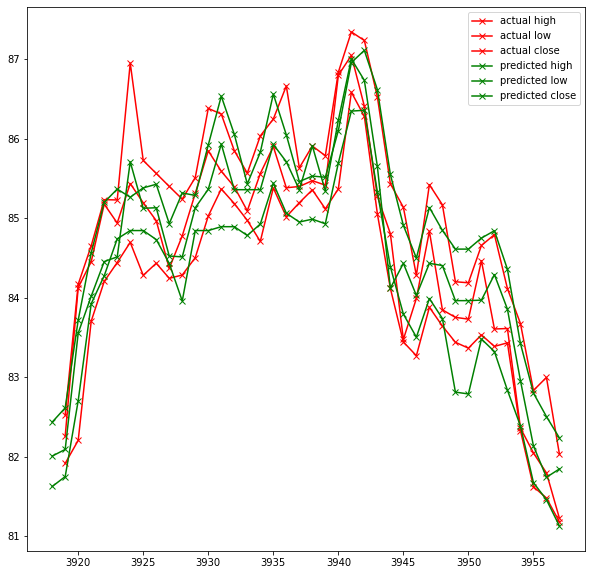

In [43]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
#include actual high and low range
line1_h = plt.plot(df_t.test_high, label = 'actual high', marker='x', color='r')
line1_l = plt.plot(df_t.test_low, label = 'actual low', marker='x', color='r')
line1_c = plt.plot(df_t.test_close, label = 'actual close', marker='x', color='r')

#overlay predicted high and low and close
line2_ph = plt.plot(df_t.pred_h, label = 'predicted high', marker='x', color='g')
line2_pl = plt.plot(df_t.pred_l, label = 'predicted low', marker='x', color='g')
line2_pc = plt.plot(df_t.pred_c, label = 'predicted close', marker='x', color='g')


plt.legend()
plt.show()
 

In [44]:
print(stop_for_sell)
print(stop_for_buy)

count    20.000000
mean      0.352450
std       0.209304
min       0.068000
25%       0.225000
50%       0.321500
75%       0.385250
max       0.967000
Name: stop_for_sell, dtype: float64
count    20.000000
mean      0.139050
std       0.103837
min       0.000000
25%       0.060750
50%       0.119500
75%       0.188500
max       0.368000
Name: stop_for_buy, dtype: float64


In [45]:
# clears the model after a run so you can contrast new runs.
# predictor.unpersist_models('ag_predict_interval')
# predictor.save_space()
# predictor.delete_models(models_to_keep='best', dry_run=False)
%rm -rf agModels-predictHigh 
%rm -rf agModels-predictLow
%rm -rf agModels-predictClose
!ls



NZDJPY_Daily_200702120000_202205120000.csv  sample_data
